# Churn Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [5]:
data.shape

(28382, 21)

In [6]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [8]:
data.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,2.838200e+04,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000,28382
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223
mean,15143.508667,2091.144105,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,7.380552e+03,...,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329,NaN
std,8746.454456,272.676775,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,4.259871e+04,...,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571,NaN
min,1.000000,73.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,-5.503960e+03,...,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,NaN
25%,7557.250000,1958.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,1.784470e+03,...,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000,NaN
50%,15150.500000,2154.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,3.281255e+03,...,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000,NaN
75%,22706.750000,2292.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,6.635820e+03,...,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000,NaN


In [9]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

## Preprocessing 1

In [10]:
data.drop(columns=['customer_id', 'last_transaction'], inplace=True)

In [11]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [12]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [13]:
data.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [14]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [15]:
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])

In [16]:
col=['dependents', 'city']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[col] = imputer.fit_transform(data[col])

In [17]:
data.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

## Univariate and Bivariate Analysis

In [18]:
data.corr()

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
vintage,1.000000,0.006220,0.004560,0.007674,-0.001154,0.003512,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004769
age,0.006220,1.000000,0.001261,0.015137,-0.076532,-0.058990,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,0.004560,0.001261,1.000000,0.003614,0.007917,-0.001704,-0.003838,-0.002181,-0.001786,-0.001967,0.003542,0.025848,0.008225,0.030746,-0.002769,-0.001672,0.029335
city,0.007674,0.015137,0.003614,1.000000,0.007011,-0.059484,-0.005747,-0.004179,-0.006379,-0.007941,0.004066,0.007952,0.001424,0.005881,-0.005888,-0.005917,-0.001447
customer_nw_category,-0.001154,-0.076532,0.007917,0.007011,1.000000,0.235059,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,0.003512,-0.058990,-0.001704,-0.059484,0.235059,1.000000,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
current_balance,0.000031,0.054346,-0.003838,-0.005747,-0.058314,0.000181,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,-0.000669,0.058342,-0.002181,-0.004179,-0.059854,0.000214,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,-0.002054,0.061708,-0.001786,-0.006379,-0.059535,0.001955,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960
average_monthly_balance_prevQ2,-0.001759,0.059607,-0.001967,-0.007941,-0.047010,0.001310,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,0.018376


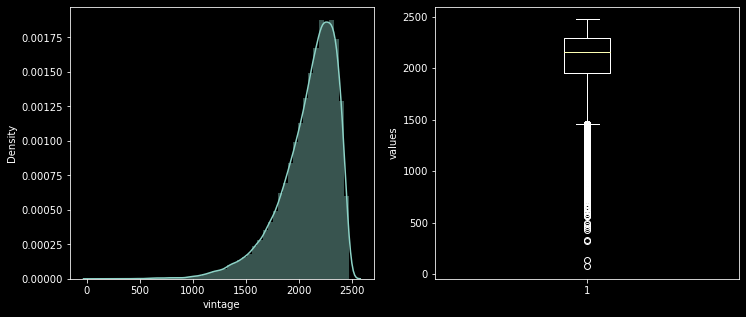

In [19]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.vintage)
fig.add_subplot(1,2,2)
plt.boxplot(data.vintage)
plt.ylabel('values')
plt.show()

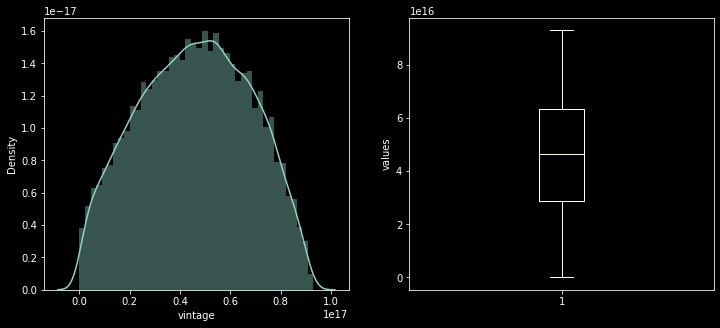

In [20]:
data.vintage = np.power(data.vintage, 5)

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.vintage)
fig.add_subplot(1,2,2)
plt.boxplot(data.vintage)
plt.ylabel('values')
plt.show()

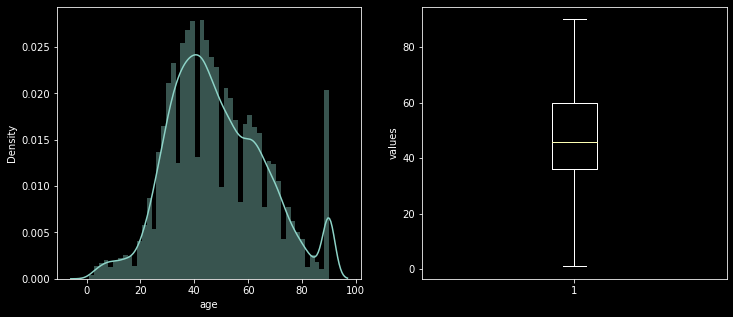

In [21]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.age)
fig.add_subplot(1,2,2)
plt.boxplot(data.age)
plt.ylabel('values')
plt.show()

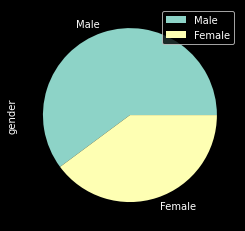

In [22]:
data['gender'].value_counts().plot(kind='pie')
plt.legend()

<AxesSubplot:>

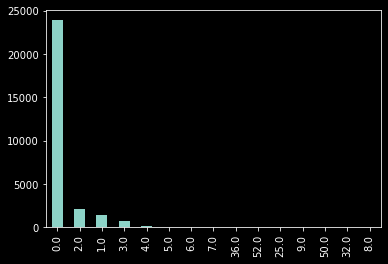

In [23]:
data.dependents.value_counts().plot(kind='bar')

<AxesSubplot:>

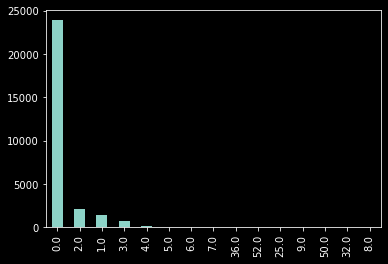

In [24]:
data.dependents.value_counts().plot(kind='bar')

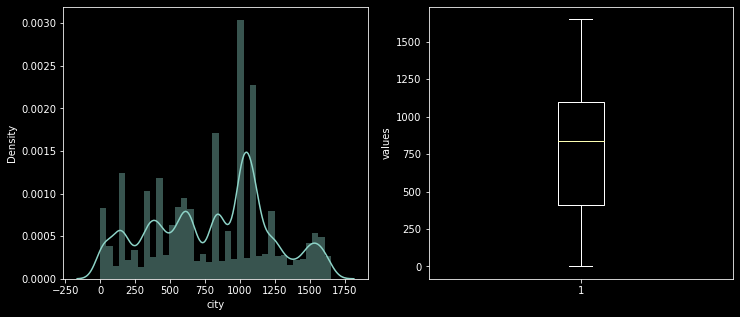

In [25]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.city)
fig.add_subplot(1,2,2)
plt.boxplot(data.city)
plt.ylabel('values')
plt.show()

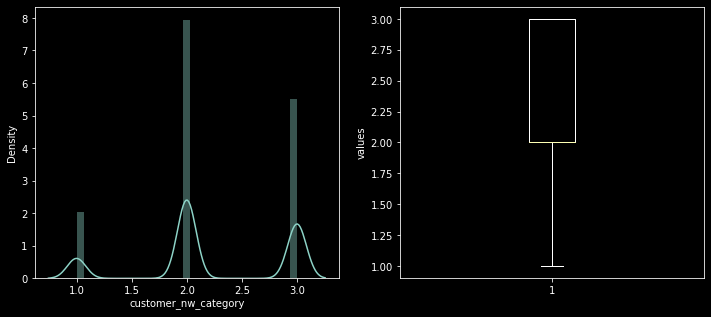

In [26]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data.customer_nw_category)
fig.add_subplot(1,2,2)
plt.boxplot(data.customer_nw_category)
plt.ylabel('values')
plt.show()

<AxesSubplot:>

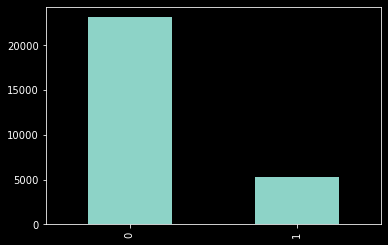

In [27]:
data.churn.value_counts().plot(kind='bar')

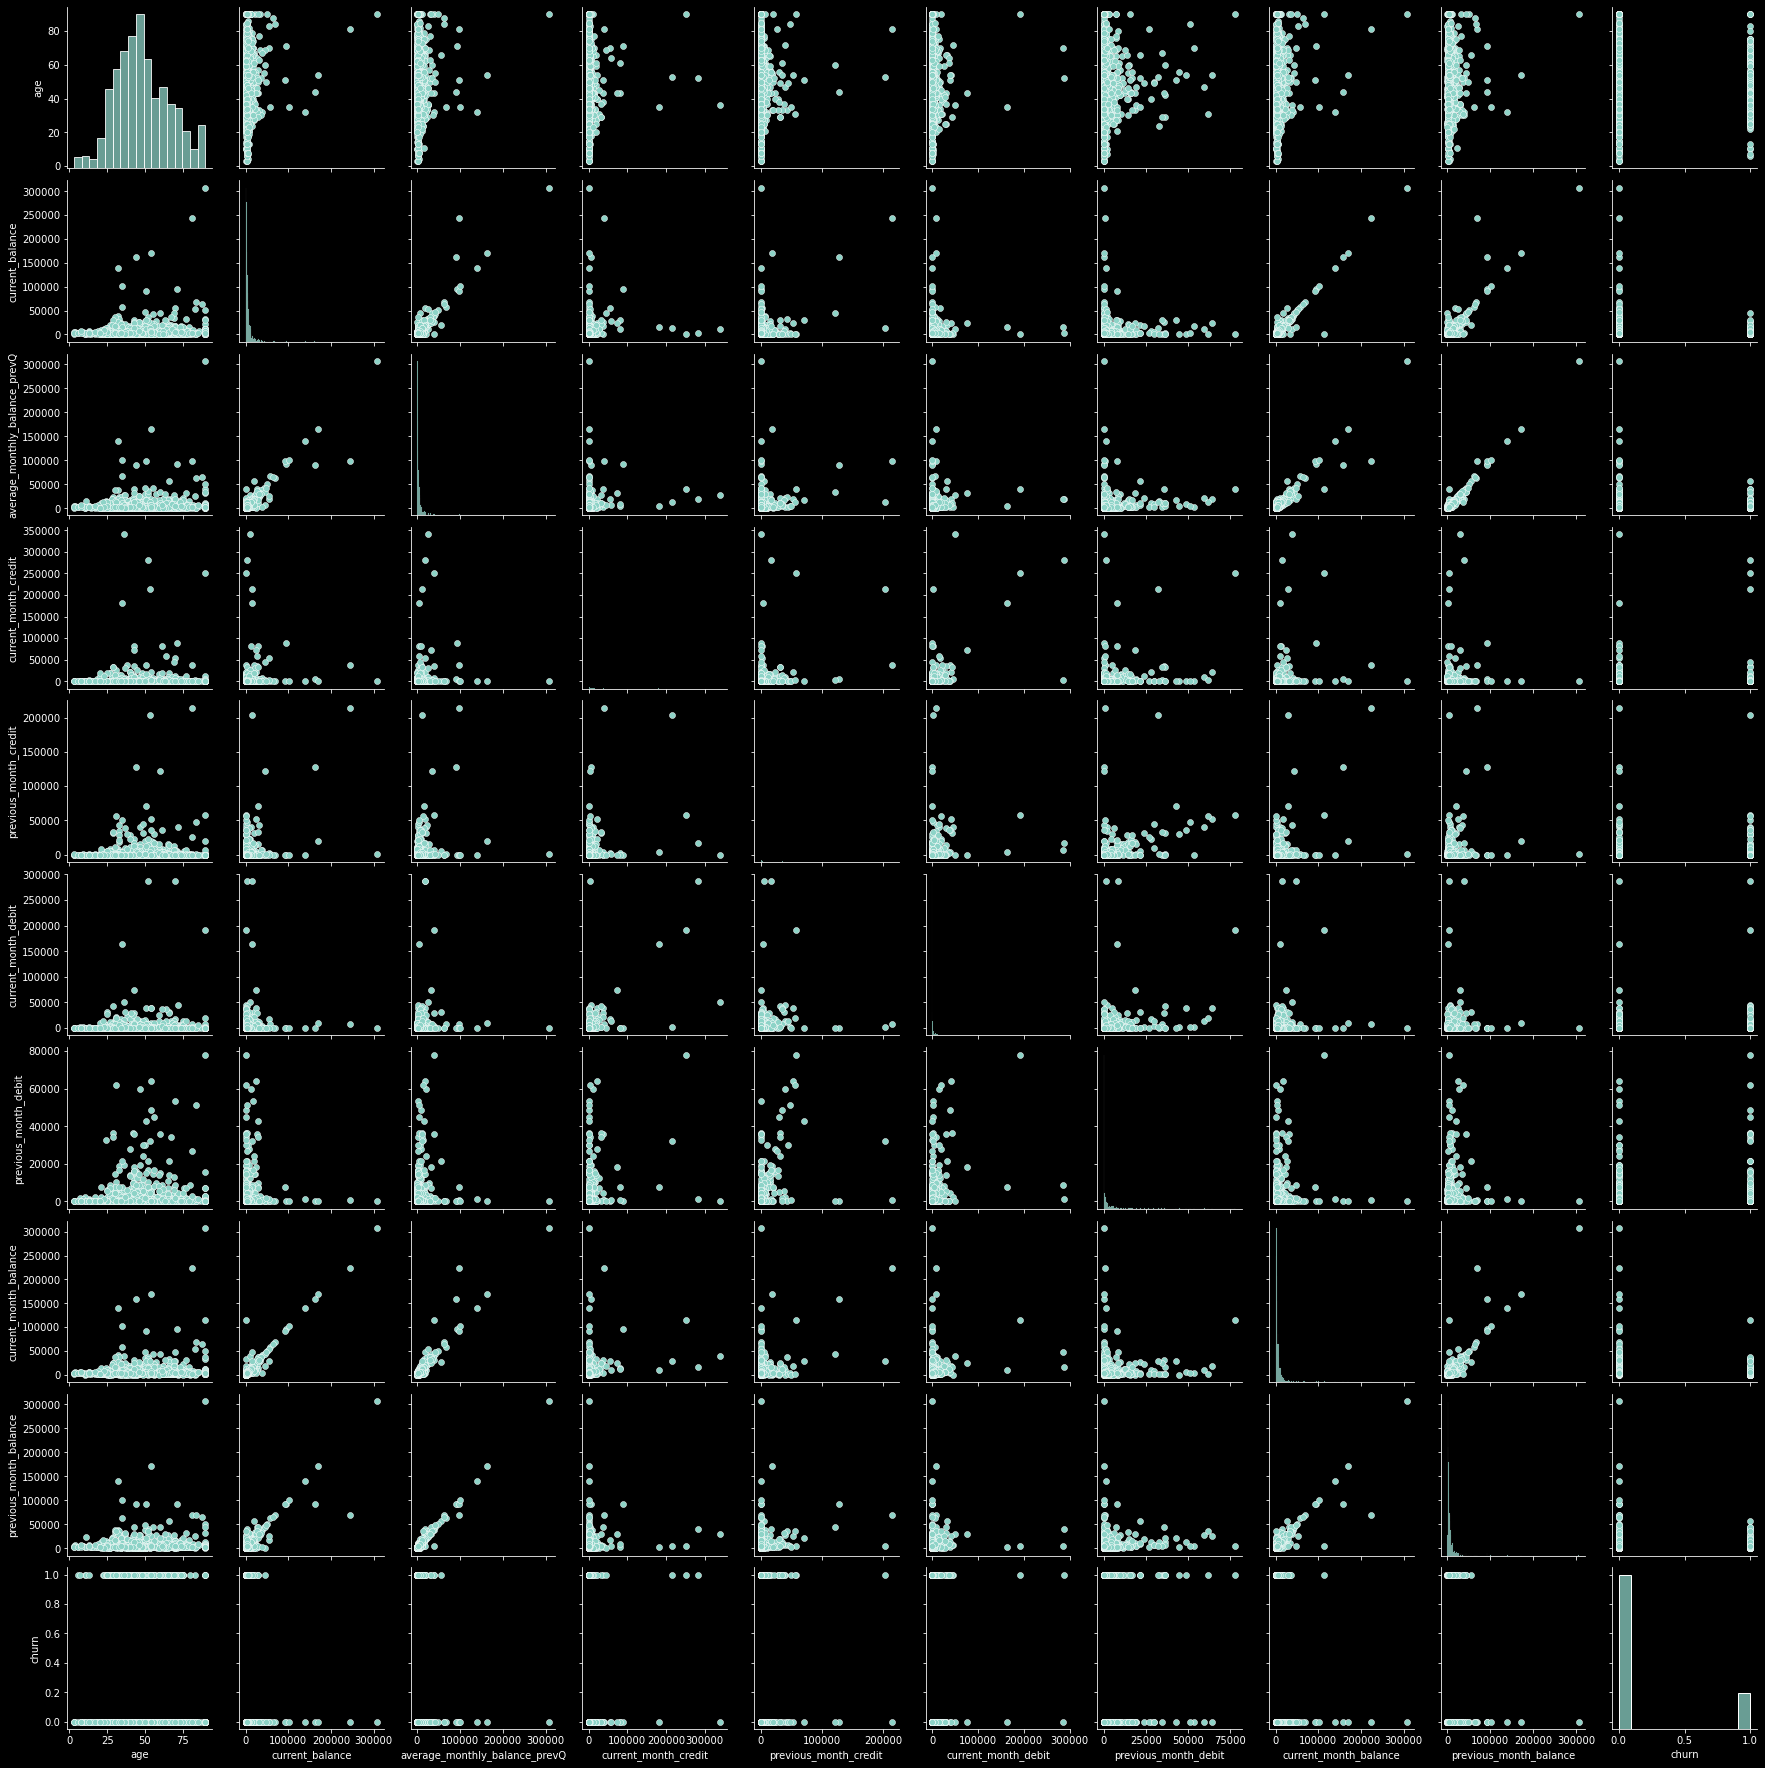

In [28]:
sns.pairplot(data.iloc[:1000], vars=[ 'age', 'current_balance', 'average_monthly_balance_prevQ',
       'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'])

<AxesSubplot:>

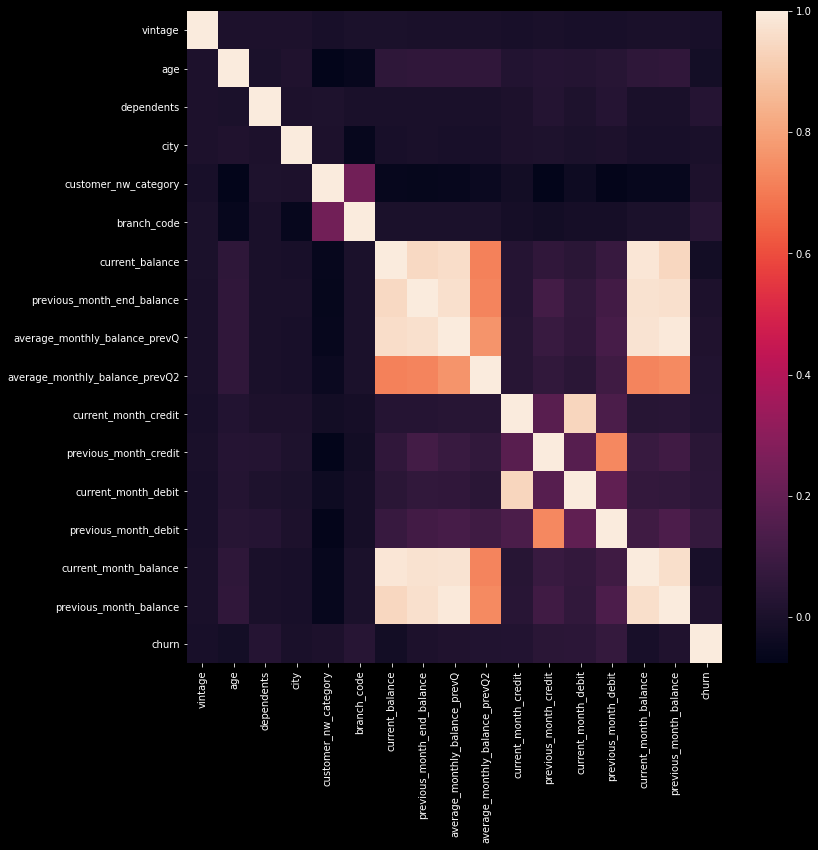

In [29]:
cor = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

## Preprocessing 2

In [30]:
data.nunique()

vintage                            1459
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

In [31]:
data = pd.get_dummies(data, columns=['gender', 'occupation'], drop_first=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         28382 non-null  int64  
 1   age                             28382 non-null  int64  
 2   dependents                      28382 non-null  float64
 3   city                            28382 non-null  float64
 4   customer_nw_category            28382 non-null  int64  
 5   branch_code                     28382 non-null  int64  
 6   current_balance                 28382 non-null  float64
 7   previous_month_end_balance      28382 non-null  float64
 8   average_monthly_balance_prevQ   28382 non-null  float64
 9   average_monthly_balance_prevQ2  28382 non-null  float64
 10  current_month_credit            28382 non-null  float64
 11  previous_month_credit           28382 non-null  float64
 12  current_month_debit             

In [33]:
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,40938343154110501,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,...,0.20,0.20,1458.71,1458.71,0,1,0,0,1,0
1,71365853298387968,35,0.0,834.0,2,3214,5390.37,8704.66,7799.26,12419.41,...,5486.27,100.56,6496.78,8787.61,0,1,0,0,1,0
2,50837374839848224,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,...,6046.73,259.23,5006.28,5070.14,0,1,0,1,0,0
3,68524747302342649,90,0.0,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,...,0.47,2143.33,2291.91,1669.79,1,1,0,0,1,0
4,9815459830163899,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,...,588.62,1538.06,1157.15,1677.16,1,1,0,0,1,0


### Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['churn']),pd.DataFrame(data.churn), random_state=42, test_size=0.3)

In [36]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((19867, 21), (8515, 21), (19867, 1), (8515, 1))

### Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [40]:
X_train

array([[ 1.10212072,  0.49292683,  1.64776341, ..., -0.56047199,
         0.78703009, -0.27807857],
       [ 0.29426702, -0.40743712, -0.31389261, ...,  1.78421048,
        -1.27059945, -0.27807857],
       [-0.47871959, -0.7450736 ,  0.6669354 , ..., -0.56047199,
         0.78703009, -0.27807857],
       ...,
       [-0.3697623 ,  0.77429057, -0.31389261, ..., -0.56047199,
         0.78703009, -0.27807857],
       [ 1.22651486,  0.83056331, -0.31389261, ...,  1.78421048,
        -1.27059945, -0.27807857],
       [ 0.7698623 ,  0.2115631 , -0.31389261, ..., -0.56047199,
         0.78703009, -0.27807857]])

## Creating the model

In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

### GaussianNB

In [42]:
gnb = GaussianNB()

In [43]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [44]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
gnb.score(X_test, Y_test)

0.8110393423370522

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6967
           1       0.35      0.05      0.08      1548

    accuracy                           0.81      8515
   macro avg       0.59      0.51      0.49      8515
weighted avg       0.74      0.81      0.75      8515



In [48]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [49]:
confusion_matrix(Y_test, y_pred)

array([[6836,  131],
       [1478,   70]], dtype=int64)

### MultinomialNB

In [50]:
mnb = MultinomialNB()

In [51]:
mnb.fit(X_train1, Y_train)

MultinomialNB()

In [52]:
y_pred = mnb.predict(X_test1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
mnb.score(X_test1, Y_test)

0.8182031708749266

In [54]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      6967
           1       0.00      0.00      0.00      1548

    accuracy                           0.82      8515
   macro avg       0.41      0.50      0.45      8515
weighted avg       0.67      0.82      0.74      8515



In [55]:
mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [56]:
confusion_matrix(Y_test, y_pred)

array([[6967,    0],
       [1548,    0]], dtype=int64)

### ComplementNB

In [57]:
cnb = ComplementNB()

In [58]:
cnb.fit(X_train1, Y_train)

ComplementNB()

In [59]:
y_pred = cnb.predict(X_test1)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [60]:
cnb.score(X_test1, Y_test)

0.4405167351732237

In [61]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.39      0.53      6967
           1       0.20      0.68      0.31      1548

    accuracy                           0.44      8515
   macro avg       0.52      0.53      0.42      8515
weighted avg       0.73      0.44      0.49      8515



In [62]:
cnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}

In [63]:
confusion_matrix(Y_test, y_pred)

array([[2704, 4263],
       [ 501, 1047]], dtype=int64)

# Inference

The dataset used is the churn dataset which provides the information that the person will leave or not leave the bank. We go through different features related to the customer and tell that whether he will leave or not. There are 21 columns and around 23500 rows in the dataset. We remove the unnecesaary columns from the dataset such as customerid. We then impute the missing values with the median and mode. The bivariate and univariate analysis is performed to find relationship between different features. The data is tranformed for attaining normal distribution and scaled for the model. The data is divided into Train and Test with the ratio of 0.7:0.3. Min Max Scaler is used for Multinomial and Complement methods and Standard Scaler is used by gaussian. We have created a Naive Bayes Model which will help in solving the churn prediction problem by analysing the past data. We have attained an accuracy of 82% with Multinomial and Gaussian methods of Naive Bayes Algorithm. The complement method yields us an accuracy of 81%. It means that out of 100 people we will predict 82 people rightly that they will leave the bank or not.